In [8]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import warnings
import time

warnings.filterwarnings("ignore")
from textblob import TextBlob


# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [11]:
tweet_data = {
    "source": [], 
    "text": [], 
    "date": [], 
    "vader_score": [], 
    "neg_score": [], 
    "pos_score": [], 
    "neu_score": []
}

target_term = ("BBC", "CBS", "CNN", "FoxNews", "nytimes")


counter = 1 
sentiments = []

for x in range(5):
    
    for term in target_term:
        
        tweets = api.user_timeline(term, page=x)
        
        for tweet in tweets:
            tweet_data["source"].append(tweet["user"]["name"])
            tweet_data["text"].append(tweet["text"])
            tweet_data["date"].append(tweet["created_at"])

            tweet_data["vader_score"].append(analyzer.polarity_scores(tweet["text"])["compound"])
            tweet_data["pos_score"].append(analyzer.polarity_scores(tweet["text"])["pos"])
            tweet_data["neu_score"].append(analyzer.polarity_scores(tweet["text"])["neu"])
            tweet_data["neg_score"].append(analyzer.polarity_scores(tweet["text"])["neg"])

            


In [12]:
tweet_df = pd.DataFrame(tweet_data, columns=["source", 
                                             "text", 
                                             "date",
                                             "vader_score",
                                             "pos_score",
                                             "neu_score",
                                             "neg_score"])


tweet_df.head()


,source,text,date,vader_score,pos_score,neu_score,neg_score
0,BBC,"😴 Five reasons sleep really, really matters.\n...",Thu Jan 03 20:00:18 +0000 2019,0.1708,0.193,0.807,0.0
1,BBC,I'm here for Sleep-tember. https://t.co/Hmvscb...,Thu Jan 03 19:05:05 +0000 2019,0.0000,0.000,1.000,0.0
2,BBC,.@BBCR1 DJs pick the best motivating music to ...,Thu Jan 03 18:01:05 +0000 2019,0.8779,0.402,0.598,0.0
3,BBC,RT @BBC6Music: What are you trying to do more ...,Thu Jan 03 17:36:13 +0000 2019,0.6808,0.211,0.789,0.0
4,BBC,".@lilyjcollins, who plays Fantine in #LesMisér...",Thu Jan 03 17:01:05 +0000 2019,0.2500,0.111,0.889,0.0


In [13]:
tweet_df.count()

source         500
text           500
date           500
vader_score    500
pos_score      500
neu_score      500
neg_score      500
dtype: int64

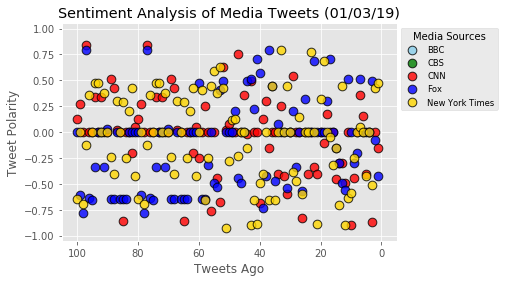

In [14]:

plt.scatter(np.arange(-len(tweet_df[tweet_df["source"] == "BBC News (World)"]), 0, 1), 
            tweet_df[tweet_df["source"] == "BBC News (World)"]["vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="skyblue", s=75,
            alpha=0.8, label="BBC")

plt.scatter(np.arange(-len(tweet_df[tweet_df["source"] == "CBS News"]), 0, 1), 
            tweet_df[tweet_df["source"] == "CBS News"]["vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="green", s=75,
            alpha=0.8, label="CBS")

plt.scatter(np.arange(-len(tweet_df[tweet_df["source"] == "CNN"]), 0, 1), 
            tweet_df[tweet_df["source"] == "CNN"]["vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="red", s=75,
            alpha=0.8, label="CNN")

plt.scatter(np.arange(-len(tweet_df[tweet_df["source"] == "Fox News"]), 0, 1), 
            tweet_df[tweet_df["source"] == "Fox News"]["vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="b", s=75,
            alpha=0.8, label="Fox")

plt.scatter(np.arange(-len(tweet_df[tweet_df["source"] == "The New York Times"]), 0, 1), 
            tweet_df[tweet_df["source"] == "The New York Times"]["vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="gold", s=75,
            alpha=0.8, label="New York Times")

plt.title("Sentiment Analysis of Media Tweets (%s)" % time.strftime("%x"))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim([-105, 5])
plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])
plt.ylim([-1.05, 1.05])
plt.grid(True)

lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper left", bbox_to_anchor=(1,1), title="Media Sources", 
                  labelspacing=0.5)


plt.show()


In [15]:
# Average all polarities by news source
tweet_df_polarity = tweet_df.groupby(["source"]).mean()["vader_score"]

# View the polarities
pd.DataFrame(tweet_df_polarity)


,vader_score
source,
BBC,0.269601
CBS,0.296792
CNN,-0.025605
Fox News,-0.116200
The New York Times,-0.056336
